<a href="https://colab.research.google.com/github/appliedcode/mthree-c422/blob/main/Exercises/day-14/Audit_Governance/AI_Audit_Governance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise: AI Governance and Compliance Check in a Classification Model

### Objective

- Understand the impact of bias in AI models
- Perform bias detection and fairness evaluation
- Introduce transparency with model interpretability using SHAP values
- Demonstrate documentation for compliance and auditing


### Setup and Instructions for Colab

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171


Outcome rates by gender group:
        total  positive_rate_actual  positive_rate_predicted
gender                                                      
0         114              0.649123                 0.657895
1          57              0.596491                 0.631579
Shape of shap_values: (171, 31, 2)


C:\Users\nilay\AppData\Local\Temp\ipykernel_24308\3990256924.py:52: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values[:, :, 1], X_test)


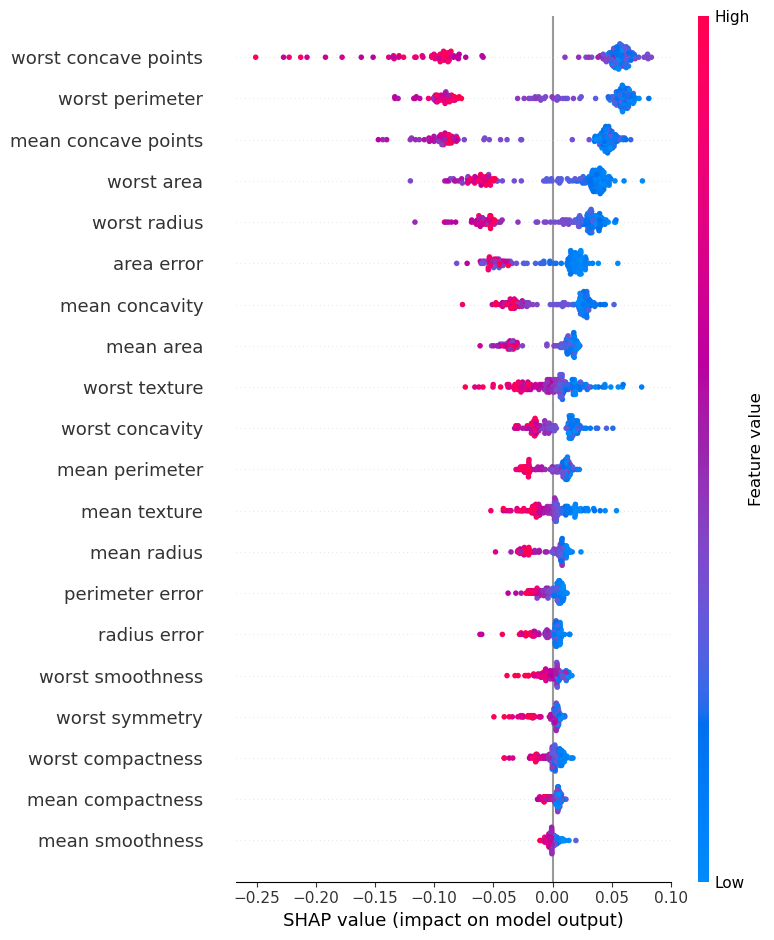


Model compliance checks:
- Bias Detection: Outcome disparities between gender groups observed as follows:
        total  positive_rate_actual  positive_rate_predicted
gender                                                      
0         114              0.649123                 0.657895
1          57              0.596491                 0.631579
- Transparency: SHAP summary plots explain feature importance.
- Data Privacy: No sensitive raw data stored or shared.
- Governance: Document model evaluation and bias checks.



In [1]:
# Install necessary packages
!pip install shap scikit-learn pandas -q

import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import shap

# Load dataset - Breast Cancer Wisconsin Dataset (binary classification)
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Add a synthetic sensitive attribute 'gender' for bias detection exercise
# Assume 0 - Female, 1 - Male, randomly assigned but unbalanced
np.random.seed(42)
gender = np.random.choice([0, 1], size=len(y), p=[0.7, 0.3])
X['gender'] = gender

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Model predictions and evaluation
y_pred = clf.predict(X_test)
print("Classification report:\n", classification_report(y_test, y_pred))

# Assess bias by comparing outcomes between gender groups
test_results = X_test.copy()
test_results['actual'] = y_test
test_results['predicted'] = y_pred
grouped = test_results.groupby('gender').agg(
    total=('actual', 'count'),
    positive_rate_actual=('actual', 'mean'),
    positive_rate_predicted=('predicted', 'mean')
)
print("\nOutcome rates by gender group:")
print(grouped)

# Model interpretability with SHAP
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)
print(f"Shape of shap_values: {shap_values.shape}")
# Plot summary plot - interpret which features impact model the most
# shap_values[1] is used to get the shap values for the positive class (malignant)
shap.summary_plot(shap_values[:, :, 1], X_test)

# Compliance Documentation (Demonstration)
compliance_notes = """
Model compliance checks:
- Bias Detection: Outcome disparities between gender groups observed as follows:
{}
- Transparency: SHAP summary plots explain feature importance.
- Data Privacy: No sensitive raw data stored or shared.
- Governance: Document model evaluation and bias checks.
""".format(grouped.to_string())

print(compliance_notes)

## Exercise: AI Governance, Compliance, and Auditing in a Classification Model

### Objective

- Detect and evaluate bias in AI models
- Enhance transparency via model interpretability (SHAP)
- Introduce fundamental AI auditing concepts: logging, monitoring, and reporting
- Perform basic compliance documentation for governance and auditing


### Colab Code with AI Auditing Additions

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171


Audit Log Entry:
{'timestamp': '2025-08-14T13:54:27.792275', 'classification_report': {'0': {'precision': 0.9833333333333333, 'recall': 0.9365079365079365, 'f1-score': 0.959349593495935, 'support': 63.0}, '1': {'precision': 0.963963963963964, 'recall': 0.9907407407407407, 'f1-score': 0.9771689497716894, 'support': 108.0}, 'accuracy': 0.9707602339181286, 'macro avg': {'precision': 0.9736486486486486, 'recall': 0.9636243386243386, 'f1-score': 0.9682592716338122, 'support': 171.0}, 'weighted avg': {'precision': 0.9711000474158369, 'recall': 0.9707602339181286, 'f1-score': 0.970603923775359, 'support': 171.0}}, 'confusion_matrix': [[59, 4], [1,

C:\Users\nilay\AppData\Local\Temp\ipykernel_24308\3813236818.py:65: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values[:, :, 1], X_test)


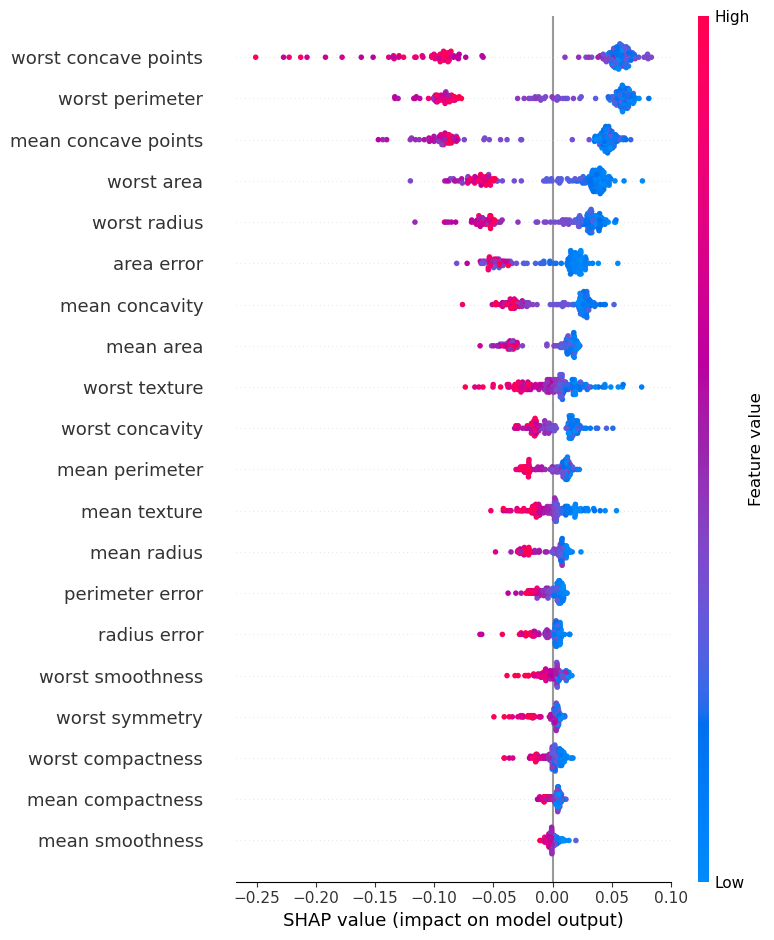


Model compliance and audit report:
- Timestamp: 2025-08-14T13:54:27.792275
- Bias Detection: Outcome disparities between gender groups:
        total  positive_rate_actual  positive_rate_predicted
gender                                                      
0         114              0.649123                 0.657895
1          57              0.596491                 0.631579
- Model Performance: Accuracy, precision, recall detailed in classification report
- Transparency: SHAP summary plot for feature importance
- Audit Logs: Confusion matrix and classification metrics stored for review
- Governance: Documenting ongoing evaluations supports regulatory compliance and ethical standards adherence



In [3]:
# Install necessary packages
!pip install shap scikit-learn pandas -q

import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import shap
import datetime

# Load dataset - Breast Cancer Wisconsin Dataset (binary classification)
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Add a synthetic sensitive attribute 'gender' for bias detection exercise
# Assume 0 - Female, 1 - Male, randomly assigned but unbalanced
np.random.seed(42)
gender = np.random.choice([0, 1], size=len(y), p=[0.7, 0.3])
X['gender'] = gender

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Model predictions and evaluation
y_pred = clf.predict(X_test)
print("Classification report:\n", classification_report(y_test, y_pred))

# Auditing Step 1: Log model performance metrics with timestamp
audit_log = {
    "timestamp": datetime.datetime.now().isoformat(),
    "classification_report": classification_report(y_test, y_pred, output_dict=True),
    "confusion_matrix": confusion_matrix(y_test, y_pred).tolist()
}

print("\nAudit Log Entry:")
print(audit_log)

# Assess bias by comparing outcomes between gender groups
test_results = X_test.copy()
test_results['actual'] = y_test
test_results['predicted'] = y_pred

grouped = test_results.groupby('gender').agg(
    total=('actual', 'count'),
    positive_rate_actual=('actual', 'mean'),
    positive_rate_predicted=('predicted', 'mean')
)

print("\nOutcome rates by gender group:")
print(grouped)

# Model interpretability with SHAP
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)

# Plot summary plot - interpret most impactful features
# shap_values[1] is used to get the shap values for the positive class (malignant)
shap.summary_plot(shap_values[:, :, 1], X_test)


# Auditing Step 2: Generate bias report for audit documentation
bias_report = grouped.to_string()
audit_log["bias_report"] = bias_report

# Auditing Step 3: Model transparency report note
transparency_note = "SHAP summary plot generated for feature importance and model interpretability."

# Compliance and Audit Documentation (Demonstration)
compliance_notes = f"""
Model compliance and audit report:
- Timestamp: {audit_log['timestamp']}
- Bias Detection: Outcome disparities between gender groups:\n{bias_report}
- Model Performance: Accuracy, precision, recall detailed in classification report
- Transparency: SHAP summary plot for feature importance
- Audit Logs: Confusion matrix and classification metrics stored for review
- Governance: Documenting ongoing evaluations supports regulatory compliance and ethical standards adherence
"""

print(compliance_notes)

## Exercise Tasks with Auditing (Rewritten)

1. **Run the Colab Code:**
    - Execute the full code cell from start to finish to train, evaluate, and audit the AI model.
2. **Review Model Performance Metrics:**
    - Examine the **classification report** (accuracy, precision, recall, F1-score).
    - Look at the **confusion matrix** captured in the audit log to understand true positives, false positives, etc.
3. **Analyze Bias Across Groups:**
    - Check the “**Outcome rates by gender group**” table.
    - Compare the difference in predicted positive rates between gender = 0 (Female) and gender = 1 (Male).
    - Reflect on whether the difference indicates **potential bias**.
4. **Interpret Model Explainability Results:**
    - Review the **SHAP summary plot** to identify which features most influenced the predictions.
    - Note how ‘gender’ impacts the model output compared to other features.
5. **Review the Audit Log \& Documentation:**
    - Check the audit log dictionary for saved **timestamps**, metrics, and the bias report.
    - Review the **compliance report text** to see how findings are documented for audits and regulatory review.
6. **Reflect on Governance \& Accountability Benefits:**
    - Consider: How do bias detection, interpretability tools, and audit logs work together to support AI governance?
    - Think about how this auditing workflow could be adapted for **real-world, regulated AI environments**.